### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/vit_b_16" --epochs 10 --arch vit_b_16 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100% 330M/330M [00:01<00:00, 269MB/s]
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0610 acc 0.8706 | val loss 0.0509 acc 0.8994 roc_auc 0.9871 pr_auc 0.9952
Epoch 2: train loss 0.0431 acc 0.9149 | val loss 0.0536 acc 0.9119 roc_auc 0.9888 pr_auc 0.9958
Epoch 3: train loss 0.0374 acc 0.9264 | val loss 0.0496 acc 0.8904 roc_auc 0.9905 pr_auc 0.9962
Epoch 4: train loss 0.0380 acc 0.9277 | val loss 0.0603 acc 0.8780 roc_auc 0.9924 pr_auc 0.9968
Epoch 5: train loss 0.0367 acc 0.9284 | val loss 0.0248 acc 0.9548 roc_auc 0.9925 pr_auc 0.9970
Epoch 6: train loss 0.0332 acc 0.9323 | val loss 0.0370 acc 0.9345 roc_auc 0.9906 pr_auc 0.9965
Epoch 7: train loss 0.0382 acc 0.9264 | val loss 0.0284 

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/vit_b_16/best_vit_b_16.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.95      0.95      0.95       237
   PNEUMONIA       0.98      0.98      0.98       669

    accuracy                           0.97       906
   macro avg       0.96      0.97      0.97       906
weighted avg       0.97      0.97      0.97       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9947
  PR-AUC: 0.9981
  Specificity>=0.90: thr=0.348 sens=0.996 spec=0.903 prec=0.967
  Best F1: thr=0.462 sens=0.985 spec=0.949 prec=0.982 f1=0.984
Confusion matrix:
[[226  11]
 [ 13 656]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria


In [ ]:
from IPython.display import Image

In [ ]:
pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/vit_b_16/best_vit_b_16.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_1.png" --arch "vit_b_16"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_1.png. Pred class id: 1


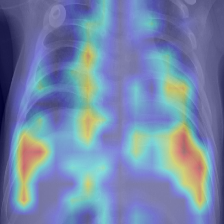

In [ ]:

Image('/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:
pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/vit_b_16/best_vit_b_16.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_2.png" --arch "vit_b_16"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_2.png. Pred class id: 1


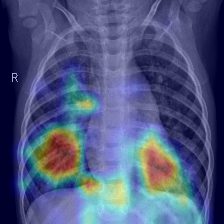

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_2.png')

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/vit_b_16/best_vit_b_16.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_noraml_1.png" --arch "vit_b_16"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_noraml_1.png. Pred class id: 0


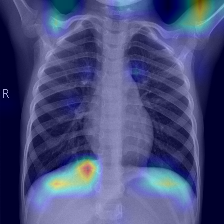

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_noraml_1.png')

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/vit_b_16/best_vit_b_16.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="vit_b_16", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 86,259,330
